In [47]:
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
df = pd.read_csv("train.csv")

In [49]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [50]:
print("Forme du Dataframe : ", df.shape)

Forme du Dataframe :  (7613, 5)


In [51]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [52]:
# thses is no duplicated.
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7608    False
7609    False
7610    False
7611    False
7612    False
Length: 7613, dtype: bool

In [53]:
#there is missing values in data
missing_values = df.isnull().sum()
print("\nValeurs manquantes :\n", missing_values)


Valeurs manquantes :
 id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


In [54]:
#Colonnes intérêted 
#Example: 'text' column for further processing of text data.
#target - 1' that speaks for accident and 'target - 0' all that does not.
interesting_columns = ['text', 'target']
df = df[interesting_columns]
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [55]:
df[df["target"] == 1]

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [56]:
df[df["target"] == 0]

,text,target
15,What's up man?,0
16,I love fruits,0
17,Summer is lovely,0
18,My car is so fast,0
19,What a goooooooaaaaaal!!!!!!,0
...,...,...
7581,@engineshed Great atmosphere at the British Li...,0
7582,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,These boxes are ready to explode! Exploding Ki...,0
7587,Sirens everywhere!,0


In [68]:

#Ratio on tweets  "catastrophes"
catastrophe_tweets = df[df['text'].str.contains('catastrophes', case=False)]
normal_tweets = df[~df['text'].str.contains('catastrophes', case=False)]

ratio_catastrophe_tweets = len(catastrophe_tweets) / len(normal_tweets)
print("Ratio de tweets sur les 'catastrophes' / tweets normaux : {:.2f}".format(ratio_catastrophe_tweets))



Ratio de tweets sur les 'catastrophes' / tweets normaux : 0.00


In [57]:
statistics = df.describe(include='all')
print("\n4. Statistiques descriptives :\n", statistics)


4. Statistiques descriptives :
                                                      text      target
count                                                7613  7613.00000
unique                                               7503         NaN
top     11-Year-Old Boy Charged With Manslaughter of T...         NaN
freq                                                   10         NaN
mean                                                  NaN     0.42966
std                                                   NaN     0.49506
min                                                   NaN     0.00000
25%                                                   NaN     0.00000
50%                                                   NaN     0.00000
75%                                                   NaN     1.00000
max                                                   NaN     1.00000


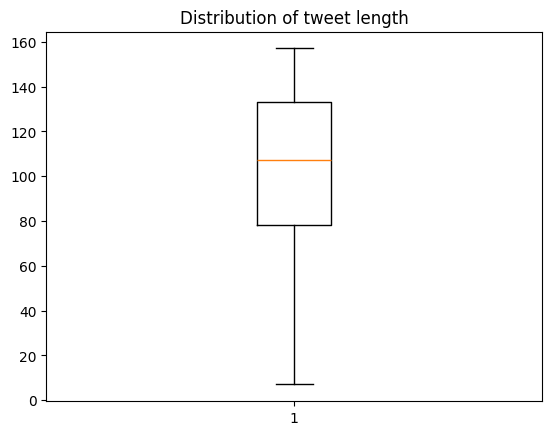

In [59]:
# Tweets anormalement longs/courts
df['tweet_length'] = df['text'].apply(len)
plt.boxplot(df['tweet_length'])
plt.title("Distribution of tweet length")
plt.show()

In [65]:
random_tweets = df.sample(5)
print("Quelques tweets au hasard :\n", random_tweets)

Quelques tweets au hasard :
                                                    text  target  tweet_length
597   FedEx no longer will transport bioterror germs...       0            83
3815  Û÷We Can HelpÛª Says Denver Firefighter Work...       1           104
473   Strongly condemn attack on ARY news team in Ka...       1           112
1407  'American Weapons and Support Are Fueling a Bl...       1            91
5763  @eac4AU You can now PRE-ORDER the film on ITUN...       0           141


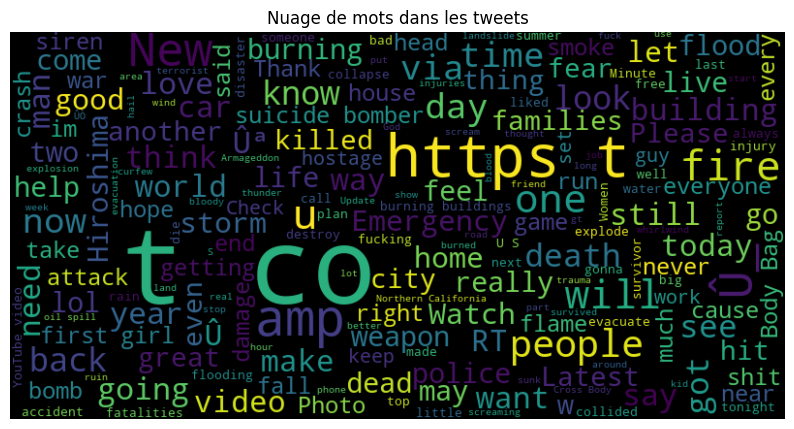

In [67]:
from wordcloud import WordCloud

all_text = ' '.join(df['text'].astype(str))
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(all_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Nuage de mots dans les tweets")
plt.show()